#### Import packages and define the namespace for the GPX schema

If you get an error here, you will have to add packages to your Python distribution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image, ExifTags
import datetime as dt
import pandas as pd
from lxml import etree
%matplotlib inline

# This is where the elements of the xml (gpx) file are defined
namespace = {'def': 'http://www.topografix.com/GPX/1/1'}

#### All of the user input comes in this cell
TODO: add prompts for file/folder names, rather than editing here

In [16]:
# User input
# Enter name of .gpx file
logfile = 'H:\\2017-06-12_Duck_UAS\\gpx\\f5.gpx'

# Enter folder with associated images
imagefolder = 'H:\\2017-06-12_Duck_UAS\\jpeg\\f5'

# Enter time offset (seconds) so that imagetime + offset = log time
-4.*3600. # The GPS data is being read in local time, the images are stamped with UTC

-14400.0

#### Define two functions to convert back and forth from Python datetime to Matlab datenum
Alternatively, I could learn how to use datetime


In [3]:
# routines to convert back and forth from datetime to Matlab datenum
def matlabdn2datetime(dn):
    """
    Input: Matlab datenum
    Returns: datetime   
    http://stackoverflow.com/questions/13965740/converting-matlabs-datenum-format-to-python
    """
    day = dt.datetime.fromordinal(int(dn))
    dayfrac = dt.timedelta(days=dn%1) - dt.timedelta(days = 366)
    return day + dayfrac

def datetime2matlabdn(dtn):
    """
    Input: datetime
    Returns: Matlab datenum  
    http://stackoverflow.com/questions/8776414/python-datetime-to-matlab-datenum
    """
    mdn = dtn + dt.timedelta(days = 366)
    frac_seconds = (dtn-dt.datetime(dtn.year,dtn.month,dtn.day,0,0,0)).seconds / (24.0 * 60.0 * 60.0)
    frac_microseconds = dtn.microsecond / (24.0 * 60.0 * 60.0 * 1000000.0)
    return mdn.toordinal() + frac_seconds + frac_microseconds

# examples
dtn=dt.datetime(2012, 2, 13, 6, 56, 2, 619000)
dn1=datetime2matlabdn(dtn)
dtn2 = matlabdn2datetime(dn1)
dn2 =datetime2matlabdn(dtn2)
print(dtn2,dn1,dn2)
print(dtn+dt.timedelta(minutes=5.))

(datetime.datetime(2012, 2, 13, 6, 56, 2, 618997), 734912.2889192014, 734912.2889192014)
2012-02-13 07:01:02.619000


### Parse the  .gpx file written by MissionPlanner, making arrays of time (in Matlab datenum representation)
...and the other stuff we want to use

(array([ 36.1810293, -75.7552479]), 36.181029299999999, -75.755247900000001)
(4860L, 2L)
(datetime.datetime(2017, 6, 12, 14, 23, 18), datetime.datetime(2017, 6, 12, 14, 40, 3), 736858.59951388894, 736858.61114583339, (4860L,))
(-0.70999999999999996, (4860L,))
(4860L, 0L)
(-0.23999999999999999, (4860L,))
(4860L, 0L)
('course: 0.0', (4860L,))
(4860L, 0L)
('roll: 0.0', (4860L,))
(4860L, 0L)
('pitch: 0.0', (4860L,))
(4860L, 0L)
('mode: Loiter', (4860L,))
(4860L, 0L)


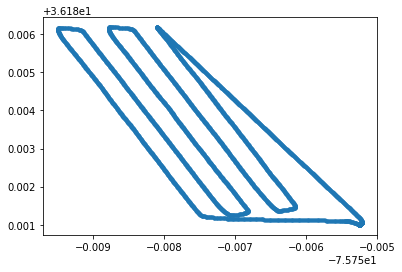

2017-06-12 14:23:18, 736858.599514, 36.1810293, -75.7552479, -0.71, -0.24, 0.0, 0.0, 0.0, Loiter
2017-06-12 14:23:18, 736858.599514, 36.1810294, -75.7552479, -0.7, -0.23, 340.7037, -1.265236, 2.383145, Loiter
2017-06-12 14:29:58, 736858.604144, 36.1810294, -75.755248, -0.7, -0.23, 340.6925, -1.266573, 2.377564, Loiter
2017-06-12 14:29:58, 736858.604144, 36.1810294, -75.7552479, -0.68, -0.21, 340.6851, -1.264506, 2.378118, Loiter
2017-06-12 14:29:58, 736858.604144, 36.1810295, -75.755248, -0.68, -0.21, 340.6866, -1.264782, 2.371143, Loiter
2017-06-12 14:29:59, 736858.604155, 36.1810295, -75.7552479, -0.67, -0.2, 340.6675, -1.27157, 2.368215, Loiter
2017-06-12 14:29:59, 736858.604155, 36.1810296, -75.755248, -0.67, -0.2, 340.656, -1.26118, 2.370797, Loiter
2017-06-12 14:30:01, 736858.604178, 36.1810297, -75.755248, -0.63, -0.16, 340.6332, -1.258554, 2.370206, Loiter
2017-06-12 14:30:02, 736858.60419, 36.1810296, -75.7552479, -0.64, -0.17, 340.6247, -1.26225, 2.371711, Loiter
2017-06-12 1

In [11]:
# Parse .gpx
tree = etree.parse(logfile)

# Extract componeents from the trackpoints (ignore the waypoints)
# latitude and longitude
elist = tree.xpath('./def:trk//def:trkpt',namespaces=namespace)
lonlat = [e.values() for e in elist]
lonlat = np.array(lonlat,dtype="float")
lat = lonlat[:,0]
lon = lonlat[:,1]
#TODO Remove these extraneous print statements
print(lonlat[0],lat[0],lon[0])
print(np.shape(lonlat))

# extract time as datetime object, then convert to Matlab datenum
elist = tree.xpath('./def:trk//def:trkpt//def:time',namespaces=namespace)
fmt = '%Y-%m-%dT%H:%M:%S-04:00' #2017-05-04T14:14:12-04:00
time = [dt.datetime.strptime(e.text, fmt) for e in elist]
dn = np.zeros((len(lon)))
for i in range(len(time)):
   dn[i] = datetime2matlabdn(time[i])
print(time[0],time[-1],dn[0],dn[-1], np.shape(time))

# The same thing works for other elements in a trkpt
elist = tree.xpath('./def:trk//def:trkpt//def:ele',namespaces=namespace)
ele = np.array([float(e.text) for e in elist])
print(ele[0], np.shape(ele))
print(np.shape(elist))

elist = tree.xpath('./def:trk//def:trkpt//def:ele2',namespaces=namespace)
ele2 = np.array([float(e.text) for e in elist])
print(ele2[0], np.shape(ele2))
print(np.shape(elist))

elist = tree.xpath('./def:trk//def:trkpt//def:course',namespaces=namespace)
course = np.array([float(e.text) for e in elist])
print("course: {}".format(course[0]), np.shape(ele2))
print(np.shape(elist))

elist = tree.xpath('./def:trk//def:trkpt//def:roll',namespaces=namespace)
roll = np.array([float(e.text) for e in elist])
print("roll: {}".format(roll[0]), np.shape(ele2))
print(np.shape(elist))

elist = tree.xpath('./def:trk//def:trkpt//def:pitch',namespaces=namespace)
pitch = np.array([float(e.text) for e in elist])
print("pitch: {}".format(pitch[0]), np.shape(ele2))
print(np.shape(elist))

elist = tree.xpath('./def:trk//def:trkpt//def:mode',namespaces=namespace)
mode = [e.text for e in elist]
print("mode: {}".format(mode[0]), np.shape(ele2))
print(np.shape(elist))

#TODO - make sure all of those arrays are the same length

# make a bare-bones trackline plot
plt.plot(lonlat[:,1],lonlat[:,0],'.')
plt.show()

# print a few of the data extracted from .gpx file
for i in range(10):
    print("{}, {}, {}, {}, {}, {}, {}, {}, {}, {}".format(time[i],dn[i],lonlat[i,0],lonlat[i,1],ele[i],ele2[i],course[i],roll[i],pitch[i],mode[i]))

# For each images, read time, add offset, get interpolated GPS info

#### Loop through all of the images, grab time, and interpolate time from other arrays

In [27]:
# get a list of image files
flist=[os.path.join(imagefolder,f) for f in os.listdir(imagefolder) if ( f.endswith('.jpg') or f.endswith('.JPG'))]
nfiles = len(flist)
print("Found {} images in {}.".format(nfiles,imagefolder))

Found 232 images in H:\2017-06-12_Duck_UAS\jpeg\f5.


In [25]:
# format for interpreting datetime
#TODO - figure out how to handle time zone
fmt = '%Y:%m:%d %H:%M:%S' #2017-05-04T14:14:12-04:00

fnames = []
ftimes = np.zeros(nfiles)

i=0
for f in flist:
    # read and print the time stamp
    t=dt.datetime.strptime(Image.open(f)._getexif()[36867], fmt)
    #fnames[i]=f
    ftimes[i]=datetime2matlabdn(t)
    i+=1
